In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=np.nan)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implementations import least_squares, least_squares_GD, least_squares_SGD, compute_loss_ls, ridge_regression, ridge_GD, ridge_SGD, logistic_regression, reg_logistic_regression, compute_logreg_loss
from preprocessing import standardize_train, standardize_test, add_bias, build_poly
from other import remove_999, remove_999col, replace_999, accuracy,replace_1, cross_validation
from plots import plot_train_test
import math

## Load data

In [112]:
output_tr, input_tr, ids_train = load_csv_data('train.csv', sub_sample=False)

## Pre-processing

In [135]:
input_train,y_train,input_test,y_test = cross_validation(input_tr,output_tr,1,10)

#### No 999 line
We delete all the lines containing a -999 inside. The y lines corresponding are also deleted. The test data are not changed.

We also try to have or not a bias.

In [136]:
# Careful to standardize the x_test with the mean and std of x_train
x_train_no_999lin, y_train_no_999lin = remove_999(input_train, y_train)

x_train_no_999lin, mean, std      = standardize_train(x_train_no_999lin)
x_train_no_999linb                = add_bias(x_train_no_999lin)  # data biased

x_test                         = standardize_test(input_test, mean, std)
x_testb                        = add_bias(x_test)                  # data biased

#### No 999 column
We delete all the columns (features) containing a -999 inside. The y data are not changed. The x_test features corresponding are also changed.

All the data are unbiaised.

In [137]:
x_train_no_999col,x_test_no_999col= remove_999col(input_train,input_test)
x_train_no_999col, mean, std      = standardize_train(x_train_no_999col)
x_train_no_999colb                = add_bias(x_train_no_999col)
x_test_no_999col                  = standardize_test(x_test_no_999col, mean, std)
x_test_no_999colb                 = add_bias(x_test_no_999col)

#### All features
We don't modify the data.

In [138]:
x_train, mean, std                = standardize_train(input_train)
x_trainb                          = add_bias(x_train)
x_te                              = standardize_test(input_test,mean,std)
x_teb                             = add_bias(x_te)

#### Put 999 to 0
We replace all the 999 with a 0 inside the train data.
We also relace them in the test data.

In [139]:
x_train_0_999                     = replace_999(input_train)
x_train_0_999, mean, std          = standardize_train(x_train_0_999)
x_train_0_999b                    = add_bias(x_train_0_999)
x_te_0_999                        = replace_999(input_test)
x_te_0_999                        = standardize_test(x_te_0_999,mean,std)
x_te_0_999b                       = add_bias(x_te_0_999)

#### Compare losses
We compute the model and the losses corresponding with least_squares.
We want to see what data processing is the best.

In [140]:
w,loss                            = least_squares(y_train,x_train)
wb,lossb                          = least_squares(y_train,x_trainb)
w_ls, loss_ls                     = least_squares(y_train_no_999lin, x_train_no_999lin)
w_lsb, loss_lsb                   = least_squares(y_train_no_999lin, x_train_no_999linb)
w_ls_red,loss_ls_red              = least_squares(y_train, x_train_no_999col)
w_ls_redb,loss_ls_redb            = least_squares(y_train, x_train_no_999colb)
w_ls_0,loss_0                     = least_squares(y_train, x_train_0_999)
w_ls_0b,loss_0b                   = least_squares(y_train, x_train_0_999b)

loss_test                         = compute_loss_ls(y_test,x_te,w)
loss_testb                        = compute_loss_ls(y_test,x_teb,wb)
loss_ls_test                      = compute_loss_ls(y_test,x_test,w_ls)
loss_lsb_test                     = compute_loss_ls(y_test,x_testb,w_lsb)
loss_ls_red_test                  = compute_loss_ls(y_test,x_test_no_999col,w_ls_red)
loss_ls_red_testb                 = compute_loss_ls(y_test,x_test_no_999colb,w_ls_redb)
loss_ls_0_test                    = compute_loss_ls(y_test,x_test,w_ls_0)
loss_ls_0_testb                   = compute_loss_ls(y_test,x_testb,w_ls_0b)

In [141]:
print("Accuracy with least squares for \t train \t \t \t test")
print("No preprocessing \t \t \t", loss,"\t",loss_test)
print("No preprocessing biaised \t \t", lossb,"\t",loss_testb)
print("Delete the lines with 999 \t \t",loss_ls,"\t",loss_ls_test)
print("Delete the lines with 999 biaised \t",loss_lsb,"\t",loss_lsb_test)
print("Delete features with 999 \t \t",loss_ls_red,"\t", loss_ls_red_test)
print("Delete features with 999 biaised \t",loss_ls_redb,"\t", loss_ls_red_testb)
print("Replace all 999 by 0 \t \t \t", loss_0,"\t", loss_ls_0_test)
print("Replace all 999 by 0 biaised \t \t", loss_0b,"\t", loss_ls_0_testb)

Accuracy with least squares for 	 train 	 	 	 test
No preprocessing 	 	 	 0.38872273293627413 	 0.5745995117756292
No preprocessing biaised 	 	 0.33937727263088907 	 0.4231021116727781
Delete the lines with 999 	 	 0.3693313868026788 	 0.4015369398484179
Delete the lines with 999 biaised 	 0.367416201055832 	 0.38741095289891514
Delete features with 999 	 	 0.4019102834459749 	 0.4017923910781926
Delete features with 999 biaised 	 0.35256482313975995 	 0.35208123687648096
Replace all 999 by 0 	 	 	 0.38828302686048394 	 39.32084364240796
Replace all 999 by 0 biaised 	 	 0.3389375665548949 	 39.47950827997806


#### Compare the accuracies

In [142]:
acc                    = accuracy(y_test,x_te,w)
accb                   = accuracy(y_test,x_teb,wb)
acc_ls                 = accuracy(y_test,x_test,w_ls)
acc_lsb                = accuracy(y_test,x_testb,w_lsb)
acc_ls_red             = accuracy(y_test,x_test_no_999col,w_ls_red)
acc_ls_redb            = accuracy(y_test,x_test_no_999colb,w_ls_redb)
acc_ls_0               = accuracy(y_test,x_test,w_ls_0)
acc_ls_0b              = accuracy(y_test,x_testb,w_ls_0b)

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1.] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]


In [143]:
print("No process \t\t", acc)
print("No process biaised\t",accb)
print("No 999 lines \t\t",acc_ls)
print("No 999 lines biaised\t",acc_lsb)
print("No 999 colum \t\t",acc_ls_red)
print("No 999 colum biaised\t",acc_ls_redb)
print("No 999 but 0 \t\t",acc_ls_0)
print("No 999 but 0 biaised\t",acc_ls_0)

No process 		 0.20516
No process biaised	 0.08432
No 999 lines 		 0.05236
No 999 lines biaised	 0.04204
No 999 colum 		 0.08468
No 999 colum biaised	 0.01228
No 999 but 0 		 0.1498
No 999 but 0 biaised	 0.1498


## Constant definitions

In [73]:
# Define the parameters of the algorithm. (probably change afterwards)
max_iters     = 100                                 
batch_size    = 1

# Initialization
w_initial     = np.random.rand(x_train_no_999.shape[1])
w_initial_ub  = np.random.rand(x_train_no_999_ub.shape[1])
w_initial_red = np.random.rand(x_train_no_999col.shape[1])

In [25]:
# For grid search of hyperparameters
num_intervals = 10
gammas        = np.linspace(0.005, 0.2, num_intervals)

  ###  Test with bigger degree

In [53]:
def model_degrees(x_tr,x_te,y_tr,y_te, w_init, degrees, max_iters):
    
    x_train_pow=build_poly(x_tr,degrees)
    x_test_pow=build_poly(x_te,degrees)
    
    w_init=np.concatenate((w_init,np.zeros(x_train_pow.shape[1]-x_tr.shape[1])),axis=0)
    
    w_sgd,loss_tr=least_squares_SGD(y_tr, x_train_pow, w_init, max_iters, 0.002)
    #print("size of x_tr",x_train_pow.shape,"shape of w_sgd",w_sgd.shape)
    loss_te = compute_loss_ls(y_te,x_test_pow,w_sgd)
    
    return loss_tr,loss_te

In [74]:
ac_tr_ub=[]
ac_te_ub=[]
ac_tr_col=[]
ac_te_col=[]
for degrees in range(1,6,1):
    acc_train,acc_test=model_degrees(x_train_no_999_ub,x_test_ub,y_train_no_999,y_test,w_initial_ub,degrees,max_iters)
    print(ac_tr_ub)
    ac_tr_ub.append(acc_train)
    ac_te_ub.append(acc_test)
    acc_train,acc_test=model_degrees(x_train_no_999col,x_test_no_999col,y_train,y_test,w_initial_red,degrees,max_iters)
    ac_tr_col.append(acc_train)
    ac_te_col.append(acc_test)

[]
[0.565419737498899]
[0.565419737498899, 0.591581759990604]
[0.565419737498899, 0.591581759990604, 0.49958892445018643]
[0.565419737498899, 0.591581759990604, 0.49958892445018643, 0.5221980796899316]


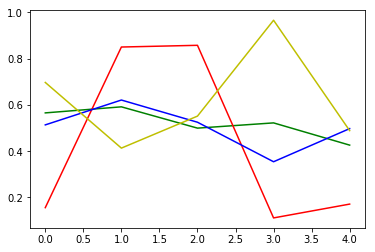

In [75]:
plt.plot(ac_tr_ub,'g-',ac_te_ub,'r-',ac_tr_col,'b-',ac_te_col,'y-')

### Test with combination of features

In [ ]:
x_train_com=build_comb()

## GD Least squares

In [217]:
def ls_gd_hyperparam(gammas, nb_fold, x_train, y_train):
    #print("y {}".format(y_train))
    loss_valid = np.zeros([len(gammas), nb_fold])
    loss_train = np.zeros([len(gammas), nb_fold])
    
    nb_elem = math.floor(x_train.shape[0]/nb_fold)
    
    for i, gamma in enumerate(gammas):
        for k in range(nb_fold):
            x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:]  
            y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]
            
            x_train_k = np.concatenate([x_train[0:k*nb_elem][:], x_train[(k+1)*nb_elem:][:]])
            y_train_k = np.concatenate([y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]   ]) 
                                        
            w, loss_tr = least_squares_GD(y_train_k, x_train_k, w_initial, max_iters, gamma)
            loss_train[i][k] = loss_tr
            loss_valid[i][k] = compute_loss_ls(y_valid_k, x_valid_k, w)
            
    return loss_valid, loss_train 

In [ ]:
loss_valid_gd, loss_train_gd = ls_gd_hyperparam(gammas, nb_fold, x_train_no_999, y_train_no_999)

In [219]:
train_gd_mean = np.mean(loss_train_gd, axis=1)
valid_gd_mean = np.mean(loss_valid_gd, axis=1)

NameError: name 'loss_train_gd' is not defined

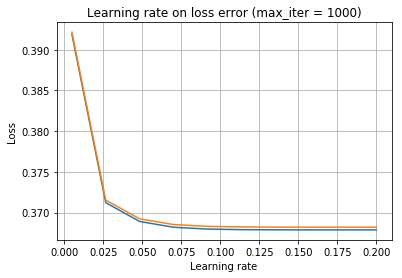

In [32]:
plot_train_test(train_gd_mean, valid_gd_mean, gammas)

In [33]:
# Minimum values for ls_gd
idx = np.argmin(valid_gd_mean)
learning_rate = gammas[idx]
ls_gd_loss = np.min(valid_gd_mean)
print(learning_rate)
print(ls_gd_loss)

0.2
0.36820105888729493


Test model

In [17]:
w_ls_gd, loss_tr = least_squares_GD(y_train_no_999, x_train_no_999, w_initial, max_iters=200, gamma=0.2)

In [18]:
accuracy_ls_gd = accuracy(w_ls_gd, x_test, y_test)
print(accuracy_ls_gd)

0.8621933063258705


# SGD Least squares

In [225]:
def ls_sgd_hyperparam_simple(gammas, nb_fold, x_train, y_train,max_iters):
    loss_valid = np.zeros([len(gammas), nb_fold])
    loss_train = np.zeros([len(gammas), nb_fold])
    
    nb_elem = math.floor(x_train.shape[0]/nb_fold)
    
    for i, gamma in enumerate(gammas):
        print(i)                                        
        w, loss_tr = least_squares_SGD(y_train, x_train, w_initial, max_iters, gamma)
        loss_train[i] = loss_tr
        loss_valid[i] = compute_loss_ls(y_test, x_test, w)
            
    return loss_valid, loss_train 

In [249]:

def ls_sgd_hyperparam(gammas, nb_fold, x_train, y_train,max_iters):
    loss_valid = np.zeros([len(gammas), nb_fold])
    loss_train = np.zeros([len(gammas), nb_fold])
    loss_test = np.zeros([len(gammas),1])
    
    nb_elem = math.floor(x_train.shape[0]/nb_fold)
    
    for i, gamma in enumerate(gammas):
        print(i)
        for k in range(nb_fold):
            x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:]  
            y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]
            
            x_train_k = np.concatenate([x_train[0:k*nb_elem][:], x_train[(k+1)*nb_elem:][:]])
            y_train_k = np.concatenate([y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]   ]) 
                                        
            w, loss_tr = least_squares_SGD(y_train_k, x_train_k, w_initial, max_iters, gamma)
            loss_train[i][k] = loss_tr
            loss_valid[i][k] = compute_loss_ls(y_valid_k, x_valid_k, w)
        
        loss_test[i] = compute_loss_ls(y_test, x_test, w)
            
    return loss_valid, loss_train,w

In [250]:
max_iters=200
num_intervals=2
gammas = np.linspace(0.0002, 0.03, num_intervals)
loss_valid_sgd, loss_train_sgd,w = ls_sgd_hyperparam(gammas, nb_fold, x_train_no_999, y_train_no_999,max_iters)

0
1


In [254]:
train_sgd_mean = np.mean(loss_train_sgd, axis=1)
valid_sgd_mean = np.mean(loss_valid_sgd, axis=1)

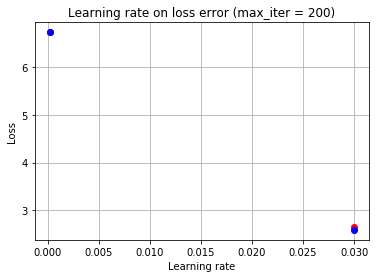

1677.2726817551716


In [258]:
plot_train_test(train_sgd_mean, valid_sgd_mean, gammas)

In [257]:
# Minimum values for ls_sgd
idx = np.argmin(valid_sgd_mean)
learning_rate = gammas[idx]
ls_sgd_loss = np.min(valid_sgd_mean)
print(learning_rate)
print(ls_sgd_loss)

0.03
2.591669576061915


In [36]:
w_ls_sgd, loss_tr = least_squares_SGD(y_train_no_999, x_train_no_999, w_initial, max_iters=200, gamma=0.0035)

In [37]:
accuracy_ls_sgd = accuracy(w_ls_sgd, x_test, y_test)
print(accuracy_ls_sgd)

0.813794571993


## DONC POUR SGD GAMMA = 0.0035
## POUR SG GAMMA = 0.2

## SGD Ridge regression

Peut etre trop long, plutot voir si on pose un 'bon' gamma, quel est le meilleur lambda.

Du coup, même fonction que avant pour hyperparam

In [211]:
#gammas = np.linspace(0.00001, 0.3, num_intervals)
lambdas = np.linspace(0.01, 20, 4)
gamma = 0.005
nb_fold = 20

In [212]:
def ridge_sgd_lambda(lambdas, nb_fold, x_train, y_train, gamma, x_test, y_test):
    accuracy_valid = np.zeros([len(lambdas), nb_fold])
    accuracy_train = np.zeros([len(lambdas), nb_fold])
    
    nb_elem = math.floor(x_train.shape[0]/nb_fold)
    
    
    for i, lambda_ in enumerate(lambdas):
        print(i)
        for k in range(nb_fold):
            x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:]  
            y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]
            
            x_train_k = np.concatenate([x_train[0:k*nb_elem][:], x_train[(k+1)*nb_elem:][:]])
            y_train_k = np.concatenate([y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]   ]) 
                                        
            w, loss_tr = ridge_SGD(y_train_k, x_train_k, w_initial, max_iters, gamma, lambda_)
            accuracy_train[i][k] = accuracy(w, x_train_k, y_train_k)
            accuracy_valid[i][k] = accuracy(w, x_test, y_test)
            
        train_sgd_mean = np.mean(accuracy_train, axis=1)
        valid_sgd_mean = np.mean(accuracy_valid, axis=1)

    return train_sgd_mean, valid_sgd_mean

In [213]:
valid_r_sgd, train_r_sgd = ridge_sgd_lambda(lambdas, nb_fold, x_train_no_999, y_train_no_999, gamma, x_test, y_test)

0
1
2
3


KeyboardInterrupt: 

In [214]:
def plot_train_test_ridge(train_sgd_mean, valid_sgd_mean, lambdas):
    fig, ax = plt.subplots()
    ax.plot(lambdas, train_sgd_mean, label='Training set')
    ax.plot(lambdas, valid_sgd_mean, label = 'Testing set')

    ax.set(xlabel='Lambdas', ylabel='Loss',
           title='Lambda on accuracy (max_iter = 200)')
    ax.grid()
    plt.xticks(lambdas)
    plt.ylim((0, 1))
    
    plt.legend()
    fig.savefig("ridge_lambda_20fold_200maxiter_only999removed.png")
    plt.show()

In [215]:
print(lambdas)

[1.00000000e-02 6.67333333e+00 1.33366667e+01 2.00000000e+01]


In [216]:
plot_train_test_ridge(train_r_sgd, valid_r_sgd, lambdas)

NameError: name 'train_r_sgd' is not defined

In [198]:
# Minimum values for ls_sgd
ind = np.unravel_index(np.argmin(valid_r_sgd, axis=None), valid_r_sgd.shape)
lambd = lambdas[ind]
ls_sgd_loss = valid_r_sgd[ind]
print(lambd)
print(ls_sgd_loss)

2.23111111111
0.344550989816


In [199]:
max_iters=200
gamma=0.005 #0.0035
lambda_ = 2.11 #to find
w_r_sgd, _ = ridge_SGD(y_train_no_999, x_train_no_999, w_initial, max_iters, gamma, lambda_)

lambda = 20 --> 0.85
         15 --> 0.85
         10 --> 0.87
         5  --> 0.85

In [200]:
accuracy_r_sgd = accuracy(w_r_sgd, x_test, y_test)
print(accuracy_r_sgd)

0.861945170862


## GD Ridge regression

In [ ]:
def ridge_gd_hyperparam(gammas, lambdas, nb_fold, x_train, y_train):
    loss_train = np.zeros([len(gammas), len(lambdas), nb_fold])
    loss_valid = np.zeros([len(gammas), len(lambdas), nb_fold])
    
    nb_elem = math.floor(x_train.shape[0]/nb_fold)
    
    for i, gamma in enumerate(gammas):
        for j, lambda_ in enumerate(lambdas):
            for k in range(nb_fold):
                
                x_valid_k = x_train[k*nb_elem:(k+1)*nb_elem][:]  
                y_valid_k = y_train[k*nb_elem:(k+1)*nb_elem]

                x_train_k = np.concatenate([x_train[0:k*nb_elem][:], x_train[(k+1)*nb_elem:][:]])
                y_train_k = np.concatenate([y_train[0:k*nb_elem],    y_train[(k+1)*nb_elem:]   ]) 

                w, loss_gamma = ridge_SGD(y_train_k, x_train_k, w_initial, max_iters, gamma, lambda_)
                loss_train[i][j][k] = loss_gamma
                loss_valid[i][j][k] = compute_loss_ridge(y_valid_k, x_valid_k, w, lambda_)
                
    return loss_train, loss_valid

In [ ]:
loss_valid_r_gd, loss_train_r_gd = ridge_gd_hyperparam(gammas, lambdas, nb_fold, x_train_no_999, y_train_no_999)

In [ ]:
train_gd_mean = np.mean(loss_train_r_gd, axis=2)
valid_gd_mean = np.mean(loss_valid_r_gd, axis=2)

In [ ]:
# Minimum values for ls_sgd
ind = np.unravel_index(np.argmin(valid_gd_mean, axis=None), valid_gd_mean.shape)
learning_rate = gammas[ind[0]]
ls_gd_loss = valid_gd_mean[ind]
print(learning_rate)
print(ls_gd_loss)

# Pas sûre des logistic regression. Voir correction lab05
Sinon toujours le même code et techniques que avant 

## Logistic regression
Debugged but not sure from here: Il y aura probablement une correction du labo 5 pour améliorer / vérifier les fonctions de logistic regression

In [85]:
y_trainLR=replace_1(y_train)
y_testLR=replace_1(y_test)

In [95]:
w_lr_init= np.random.rand(x_trainb.shape[1])

In [96]:
w_lr, loss_lr = logistic_regression(y_train,x_trainb, w_lr_init,100,0.1)

In [100]:
loss_lr_train= compute_logreg_loss(y_train[:10],x_trainb[:10][:],w_lr)
acc_lr_train=accuracy(y_train[:10],x_trainb[:10],w_lr)

[1. 0. 0. 0. 0. 1. 1. 1. 0. 1.] [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


In [108]:
print(len(y_test==0))

568238


In [104]:
loss_lr_test = compute_logreg_loss(y_test[:10],x_teb[:10][:],w_lr)
acc_lr_test=accuracy(y_test[:10],x_teb[:10][:],w_lr)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [101]:
print(loss_lr_train,acc_lr_train, loss_lr_test, acc_lr_test)

0.5823816075669359 0.9 1.560736604121226 0.2444116725738159


## Regularized Logistic Regression

# Prediction de chaque méthode pour Kaggle

In [ ]:
y_pred = predict_labels(w, x_test)